# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime

# Import API key
import api_keys
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

print(citipy)

<module 'citipy.citipy' from '/Users/neelashivakumar/Documents/GitHub/Python-APIs-Homework/citipy/citipy.py'>


## Generate Cities List

In [2]:
today = f"{datetime.datetime.now():%m/%d/%y}"
print (today)

12/22/18


In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

629

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

# set up lists to hold reponse info
City = []
Cloudiness = []
Country = []
Date = []
Humidity = []
Lat = []
Lng = []
Max_Temp = []
Wind_Speed = []

In [5]:
# Loop through the list of cities and perform a request for data on each

print('Beginning Data Retrieval')     
print('-----------------------------')
i=0 

for city in cities:
    #print(f"query_url is : {query_url}")
    response = requests.get(query_url + city).json()
    #print(f"response is : {response}")
    cod = response['cod']
    if cod == 200: 
        i = i + 1
        City.append(response['name'])
        Cloudiness.append(response['clouds']['all'])
        Country.append(response['sys']['country'])
        Date.append(response['dt'])
        Humidity.append(response['main']['humidity'])
        Lat.append(response['coord']['lat'])
        Lng.append(response['coord']['lon'])
        Max_Temp.append(response['main']['temp_max'])
        Wind_Speed.append(response['wind']['speed'])
        print(f'Processing Record {i} of Set 1 | {city}')
    else:
        print(f'City not found. Skipping...')
    
print(f'-----------------------------')
print(f'Data Retrieval Complete     ')
print(f'-----------------------------')



Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | hilo
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | cape town
Processing Record 5 of Set 1 | kodiak
City not found. Skipping...
Processing Record 6 of Set 1 | bredasdorp
Processing Record 7 of Set 1 | bluff
Processing Record 8 of Set 1 | ilulissat
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | berezhany
Processing Record 11 of Set 1 | neiafu
Processing Record 12 of Set 1 | shar
Processing Record 13 of Set 1 | bulgan
Processing Record 14 of Set 1 | hermanus
Processing Record 15 of Set 1 | meulaboh
Processing Record 16 of Set 1 | camapua
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | saint george
Processing Record 19 of Set 1 | paamiut
Processing Record 20 of Set 1 | puerto ayora
Processing Record 21 of Set 1 | saskylakh
Processing Record 22 of Set 1 | pisco
Processing Record 23 of Set 1 | lom

Processing Record 183 of Set 1 | bure
Processing Record 184 of Set 1 | itanhaem
Processing Record 185 of Set 1 | vanavara
Processing Record 186 of Set 1 | ketchikan
Processing Record 187 of Set 1 | severo-kurilsk
Processing Record 188 of Set 1 | alice springs
Processing Record 189 of Set 1 | kavieng
Processing Record 190 of Set 1 | poum
Processing Record 191 of Set 1 | bollnas
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 192 of Set 1 | kieta
Processing Record 193 of Set 1 | zeulenroda
Processing Record 194 of Set 1 | kincardine
Processing Record 195 of Set 1 | itoman
City not found. Skipping...
Processing Record 196 of Set 1 | aklavik
Processing Record 197 of Set 1 | bubaque
Processing Record 198 of Set 1 | wanning
Processing Record 199 of Set 1 | yendi
Processing Record 200 of Set 1 | arraial do cabo
Processing Record 201 of Set 1 | necochea
Processing Record 202 of Set 1 | likasi
Processing Record 203 of Set 1 | omboue
Processi

Processing Record 362 of Set 1 | coleraine
Processing Record 363 of Set 1 | tuatapere
Processing Record 364 of Set 1 | khuzhir
Processing Record 365 of Set 1 | aanekoski
Processing Record 366 of Set 1 | natal
Processing Record 367 of Set 1 | jega
Processing Record 368 of Set 1 | alanya
City not found. Skipping...
Processing Record 369 of Set 1 | khovu-aksy
Processing Record 370 of Set 1 | gueugnon
City not found. Skipping...
Processing Record 371 of Set 1 | malmyzh
Processing Record 372 of Set 1 | thinadhoo
Processing Record 373 of Set 1 | opuwo
Processing Record 374 of Set 1 | christchurch
Processing Record 375 of Set 1 | nuevo progreso
City not found. Skipping...
Processing Record 376 of Set 1 | jian
City not found. Skipping...
Processing Record 377 of Set 1 | vaitape
Processing Record 378 of Set 1 | ozoir-la-ferriere
Processing Record 379 of Set 1 | saint albans
Processing Record 380 of Set 1 | nioro
Processing Record 381 of Set 1 | beira
Processing Record 382 of Set 1 | dolores
Pro

Processing Record 542 of Set 1 | salinopolis
Processing Record 543 of Set 1 | dakar
Processing Record 544 of Set 1 | gravdal
City not found. Skipping...
Processing Record 545 of Set 1 | berlevag
Processing Record 546 of Set 1 | prachuap khiri khan
Processing Record 547 of Set 1 | coahuayana
Processing Record 548 of Set 1 | galatas
Processing Record 549 of Set 1 | parfino
Processing Record 550 of Set 1 | grindavik
Processing Record 551 of Set 1 | alegria
Processing Record 552 of Set 1 | taksimo
Processing Record 553 of Set 1 | kompaniyivka
Processing Record 554 of Set 1 | urucara
Processing Record 555 of Set 1 | tigil
Processing Record 556 of Set 1 | tomatlan
Processing Record 557 of Set 1 | isla vista
Processing Record 558 of Set 1 | nanakuli
Processing Record 559 of Set 1 | kralendijk
Processing Record 560 of Set 1 | bemidji
City not found. Skipping...
Processing Record 561 of Set 1 | bambanglipuro
Processing Record 562 of Set 1 | okha
-----------------------------
Data Retrieval Comp

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_dict = {
    "City": City,
    "Cloudiness": Cloudiness,
    "Country": Country,
    "Date": Date,
    "Humidity": Humidity,
    "Lat": Lat,
    "Lng": Lng,
    "Max Temp": Max_Temp,
    "Wind Speed": Wind_Speed
}

weather_data = pd.DataFrame(weather_dict)
weather_data.to_csv('WeatherPy_data.csv')

# print lengh of each list 
print(f'City          {len(City)}')
print(f'Cloudiness    {len(Cloudiness)}')
print(f'Country    {len(Country)}')
print(f'Date    {len(Date)}')
print(f'Humidity    {len(Humidity)}')
print(f'Lat    {len(Lat)}')
print(f'Lng    {len(Lng)}')
print(f'Max Temp    {len(Max_Temp)}')
print(f'Wind Speed    {len(Wind_Speed)}')

City          562
Cloudiness    562
Country    562
Date    562
Humidity    562
Lat    562
Lng    562
Max Temp    562
Wind Speed    562


In [7]:
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Hilo,90,US,1545533580,84,19.71,-155.08,23.90,4.60
1,Busselton,0,AU,1545534652,72,-33.64,115.35,25.19,4.43
2,Albany,90,US,1545533820,63,42.65,-73.75,2.20,5.10
3,Cape Town,75,ZA,1545531900,94,-33.93,18.42,20.00,4.60
4,Kodiak,1,US,1545533700,69,39.95,-94.76,1.20,3.10


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

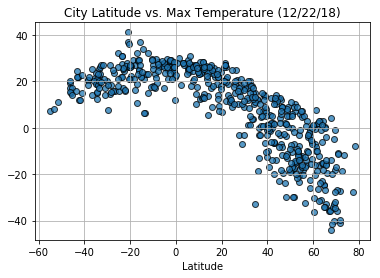

In [12]:
plt.title(f"City Latitude vs. Max Temperature ({today})")
plt.xlabel("Latitude")


plt.scatter(Lat, Max_Temp, marker="o", alpha=.75, edgecolors="k")
plt.savefig('max_temperature')
plt.grid()
plt.show()


#### Latitude vs. Humidity Plot

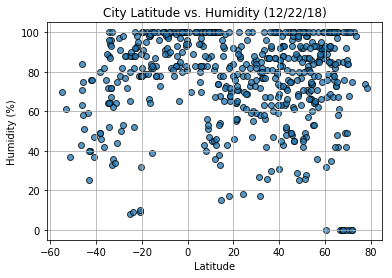

In [15]:
plt.title(f"City Latitude vs. Humidity ({today})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")


plt.scatter(Lat, Humidity, marker="o", alpha=.75, edgecolors="k")
plt.grid()
plt.show()


#### Latitude vs. Cloudiness Plot

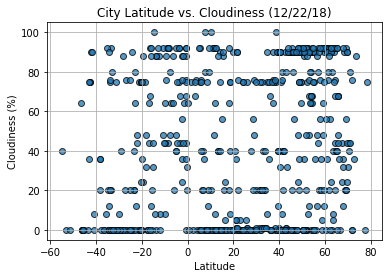

In [14]:
plt.title(f"City Latitude vs. Cloudiness ({today})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")


plt.scatter(Lat, Cloudiness, marker="o", alpha=.75, edgecolors="k")
plt.grid()
plt.show()


#### Latitude vs. Wind Speed Plot

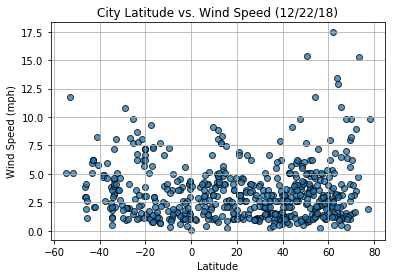

In [13]:
plt.title(f"City Latitude vs. Wind Speed ({today})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")


plt.scatter(Lat, Wind_Speed, alpha=.75, edgecolors="k")
plt.grid()
plt.show()
